In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
carbon=np.loadtxt('carbon.csv',delimiter=',')*[67.87, 67.87, 67.87]*1.1 #1.1 makes up for density

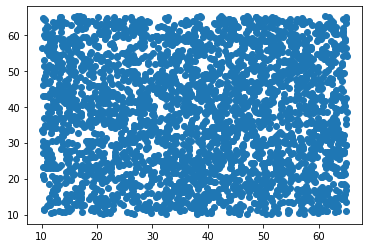

In [3]:
fig, ax = plt.subplots()
ax.scatter(carbon[0:3000,0],carbon[0:3000,1])
plt.show()

In [4]:
carbon=carbon-[0,0,np.min(carbon[:,2])]

In [5]:
np.max(carbon[:,2])

38.171632259684

In [6]:
print(carbon.shape)

(8991, 3)


In [7]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN=carbon+(noise-0.5)*0.1
for i in range(0,1): #5 for 30, 9 for 50, 15 for 80
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN=np.concatenate([SiN,carbon2])
        print(i)

0


In [8]:
element_random=np.random.random_sample([SiN.shape[0],1])
elements=14*np.ones([SiN.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN=np.concatenate([elements,SiN],axis=1)

In [9]:
Au=np.loadtxt('NPs2.csv',delimiter=',')*72.91
Au=Au-[0,0,np.min(Au[:,2])]

In [10]:
np.max(Au[:,2])

17.78153665252

In [11]:
cellmax=np.max(SiN[:,3])
print(cellmax)

76.39383730639153


In [12]:
Au=Au+[0,0,cellmax]
np.max(Au[:,2])

94.17537395891154

In [13]:
elements=np.ones([Au.shape[0],1])
elements=elements.astype('object')
elements[elements>3/7]='Au'

Au=np.concatenate([elements,Au],axis=1)

In [14]:
stack=np.concatenate([SiN,Au])

In [15]:
cellmax1=np.max(stack[:,3])
print(cellmax1)

94.17537395891154


In [16]:
760*5e-7/62.36/293*1000*1e-20*6.02*1e23

0.12520058583103283

In [17]:
#0.034 atoms/A^2
atoms_gas=int(0.125*67.87*1.1*67.87*1.1)

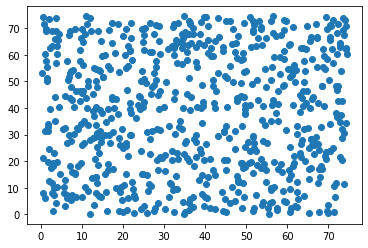

In [18]:
0.035*67.8749*67.8749
gx=np.random.uniform(0,1*67.87*1.1,atoms_gas)
gy=np.random.uniform(0,1*67.87*1.1,atoms_gas)
gz=0.1*np.random.uniform(0,1*67.87*1.1,atoms_gas)+cellmax1

gas=np.zeros([atoms_gas,3])
gas[:,0]=gx
gas[:,1]=gy
gas[:,2]=gz

fig,ax=plt.subplots()
ax.scatter(gas[:,0], gas[:,1])
plt.show()

In [19]:
elements=np.ones([gas.shape[0],1])
elements=elements.astype('object')
elements[elements>3/7]='Ar'

gas=np.concatenate([elements,gas],axis=1)

In [20]:
stack=np.concatenate([stack,gas])

In [21]:
cellmax2=np.max(stack[:,3])
print(cellmax2)

101.63686283437892


In [22]:
noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
SiN2=carbon+(noise-0.5)*0.1
for i in range(0,1): #5 for 30, 9 for 50, 15 for 80
        noise=np.random.random_sample([carbon.shape[0],carbon.shape[1]])
        carbon2=carbon+(noise-0.5)*0.1
        carbon2[:,1]=np.flipud(carbon2[:,1])
        carbon2=carbon2+[0,0,np.max(carbon2[:,2])]
        SiN2=np.concatenate([SiN2,carbon2])
        print(i)

0


In [23]:
SiN2=SiN2+[0,0,cellmax2]

In [24]:
element_random=np.random.random_sample([SiN2.shape[0],1])
elements=14*np.ones([SiN2.shape[0],1])
elements=elements.astype('object')
elements[element_random>3/7]='N'
elements[element_random<=3/7]='Si'

SiN2=np.concatenate([elements,SiN2],axis=1)

In [25]:
stack=np.concatenate([stack,SiN2])

In [31]:
print(np.max(stack[:,1]),np.max(stack[:,2]),np.max(stack[:,3]))

74.45509527731882 74.5842405642861 177.92456092101355


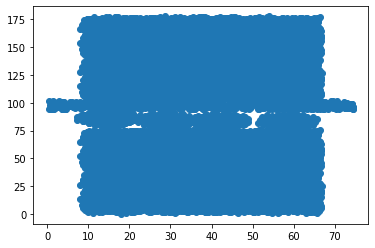

In [27]:
fig, ax = plt.subplots()
ax.scatter(stack[:,1],stack[:,3])
plt.show()

In [28]:
NP_only=stack[stack[:,0]=='Au']
np.savetxt("NP_only.xyz", NP_only, fmt='%s %.2f %.2f %.2f',delimiter=" ")
print(NP_only.shape)

(580, 4)


In [48]:
NP_gas=stack[np.logical_or(stack[:,0]=='Au', stack[:,0]=='Ar')]
print(NP_gas.shape)
np.savetxt("NP_Ar.xyz", NP_gas, fmt='%s %.2f %.2f %.2f',delimiter=" ")

(1276, 4)


In [30]:
np.savetxt("stack.xyz", stack, fmt='%s %.2f %.2f %.2f',delimiter=" ")
print(stack.shape)

(37240, 4)


In [52]:
NP_H2=NP_gas
NP_H2[:,0][NP_H2[:,0]=='Ar']='He'
np.savetxt("NP_H2.xyz", NP_H2, fmt='%s %.2f %.2f %.2f',delimiter=" ")

In [57]:
NP_O2=NP_gas
NP_O2[:,0][NP_O2[:,0]=='He']='S'
np.savetxt("NP_O2.xyz", NP_H2, fmt='%s %.2f %.2f %.2f',delimiter=" ")